# Summer surface

We wish to use the summer surface as reference to subtract from the other scans.

In [7]:
%run little_awk_functions.py

In [2]:
import xarray as xr

In [38]:
ds = xr.open_mfdataset('/home/mabonnet/Desktop/data/2021_2022_livox_surfaces/202107*.nc')

In [39]:
ds = ds.ffill(dim='time')

In [40]:
# ds['surface'].isel(x=35, y=46).dropna('time').plot()

In [41]:
# ds['surface'].isel(x=35, y=46).ffill('time').plot()

In [42]:
ds['snow_surface'] = ds['surface'].rolling({'x': 9, 'y': 9}, center=True).median()
ds['snow_surface'] = ds['snow_surface'].rolling(time=43, center=True).median()

/home/mabonnet/miniconda3/envs/awk/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning:

All-NaN slice encountered



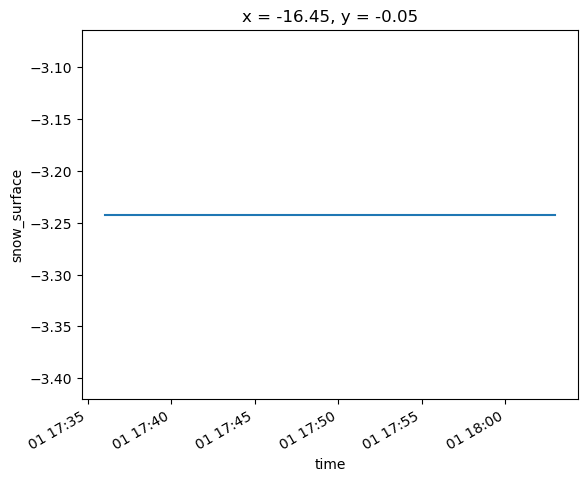

In [43]:
ds.snow_surface.isel(x=35, y=46).plot()

In [50]:
ds.snow_surface.isel(time=int(len(ds.time.values)/2)).to_netcdf('summer_surface.nc')

/home/mabonnet/miniconda3/envs/awk/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning:

All-NaN slice encountered



In [3]:
data_summer = xr.open_dataset('summer_surface.nc')
data_summer

<xarray.Dataset>
Dimensions:       (x: 201, y: 91)
Coordinates:
    time          datetime64[ns] ...
  * x             (x) float64 -19.95 -19.85 -19.75 -19.65 ... -0.15 -0.05 0.05
  * y             (y) float64 4.55 4.45 4.35 4.25 ... -4.15 -4.25 -4.35 -4.45
Data variables:
    snow_surface  (y, x) float32 ...

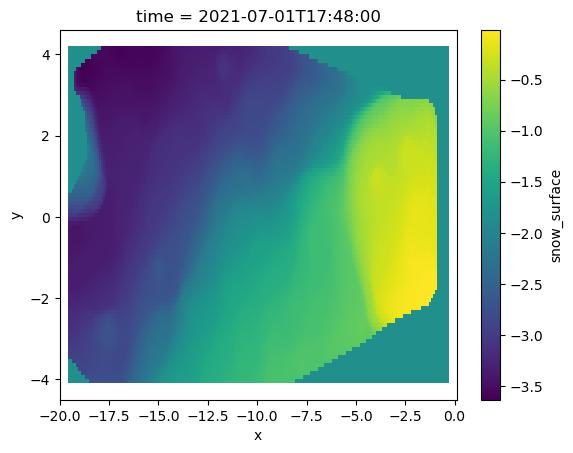

In [5]:
data_summer.snow_surface.plot()

In [15]:
def make_summer_netcdf(ds, x_span=9, y_span=9, time_span=43):
    '''
    Function that cleans a dataset containing the summer lidar data and stores the median ground height in a netcdf file
    Args:
        ds: dataset containing the summer scans' data in a 'mean' variable
        x_span: x-span on which to apply median filtering, unit [index], default 9
        y_span: y-span on which to apply fmedian iltering, unit [index], default 9
        time_span: time-span on which to apply median filtering, unit [index], default 43
    Returns:
    '''
    ds.ffill(dim='time')
    ds['snow_surface'] = ds['mean'].rolling({'x': x_span, 'y': y_span}, center=True).median()
    ds['snow_surface'] = ds['snow_surface'].rolling(time=time_span, center=True).median()
    ds.snow_surface.isel(time=int(len(ds.time.values)/2)).to_netcdf('/home/mabonnet/github/MB_little_awk/summer_surface.nc')

In [16]:
ds = xr.open_mfdataset('/home/mabonnet/Desktop/data/2021_2022_livox_surfaces/202107*.nc')

In [17]:
fill_in_missing_variables(ds, 'surface')

In [18]:
make_summer_netcdf(ds)

/home/mabonnet/miniconda3/envs/awk/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
